In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import cPickle as pickle
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from code.clusterize import *

In [3]:
df = pickle.load(open('featuresdf.pkl', 'rb'))
df.shape

(7334, 11)

In [4]:
fnums = {0: 'taxable_value',
         1: 'grocery',
         2: 'restaurant',
         3: 'retail',
         4: 'ncrimes',
         5: 'sgnf',
         6: 'avg_hh_size',
         7: 'population',
         8: 'walkscore'}

In [5]:
%time cnum = cut2cluster('010405', 20)

In [6]:
df = df.ix[cnum.index]
df.shape

(7325, 11)

In [7]:
features = [fnums[n] for n in [1, 4, 5]]
features

['grocery', 'ncrimes', 'sgnf']

In [8]:
fdf = df[[fnums[n] for n in [1, 4, 5]]]
fdf.shape

(7325, 3)

In [9]:
km = KMeans(n_clusters=20, n_jobs=-1)
km.fit(fdf)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=-1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [10]:
yhat = km.predict(fdf)

In [11]:
yhat

array([14, 12,  4, ..., 14, 12, 12], dtype=int32)

In [12]:
wcssn = wcss(fdf, cnum)
wcsskm = wcss(fdf, yhat)

In [13]:
print wcssn.sum()
print wcsskm.sum()

14311.5137978
1536.19274361


#kmeans clusters

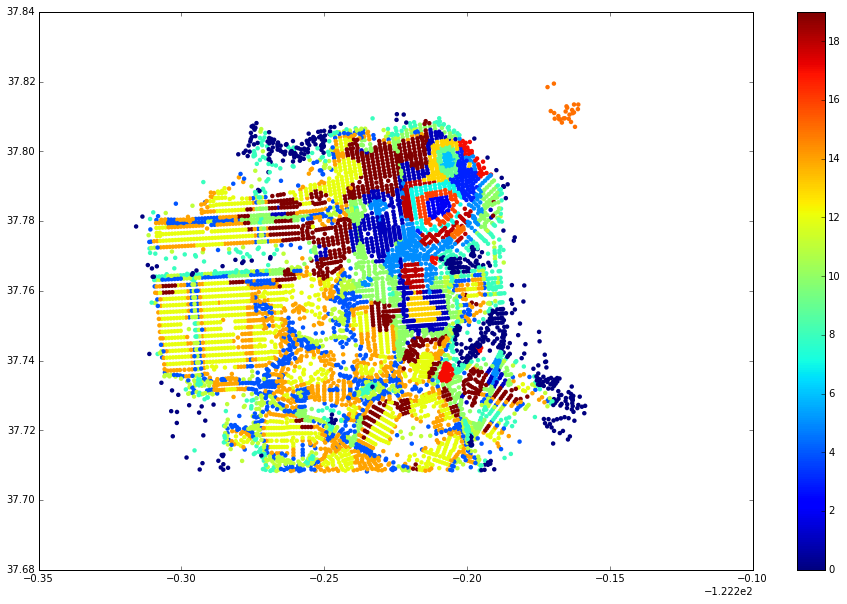

In [35]:
plt.figure(figsize = (16, 10))
plt.scatter(df.lon, df.lat, c=yhat, linewidths = 0)
plt.colorbar();

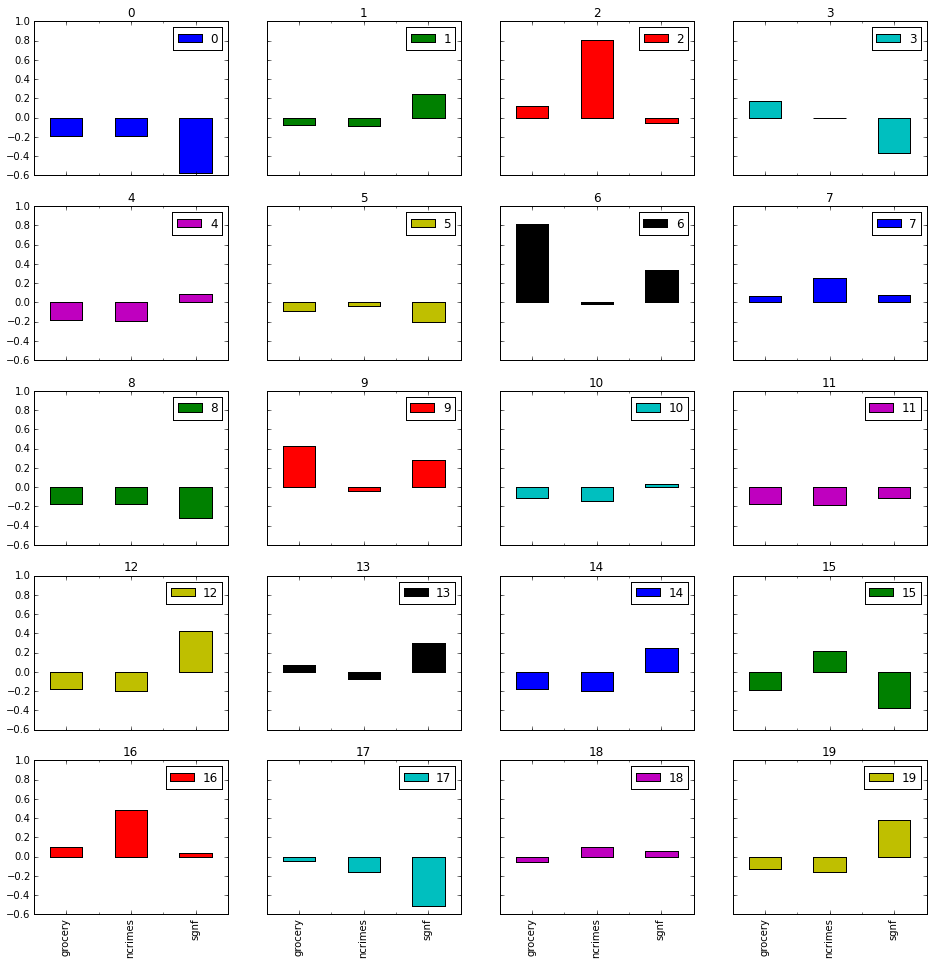

In [15]:
feature_bars(fdf, yhat, figsize=(16, 16), layout=(5,4))

# neighborhood cluster results

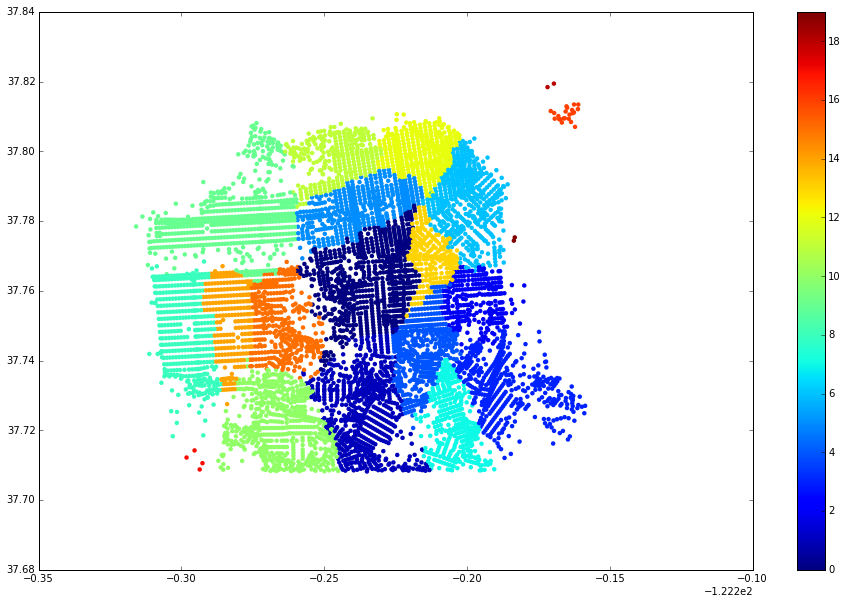

In [34]:
plt.figure(figsize = (16, 10))
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0)
plt.colorbar();

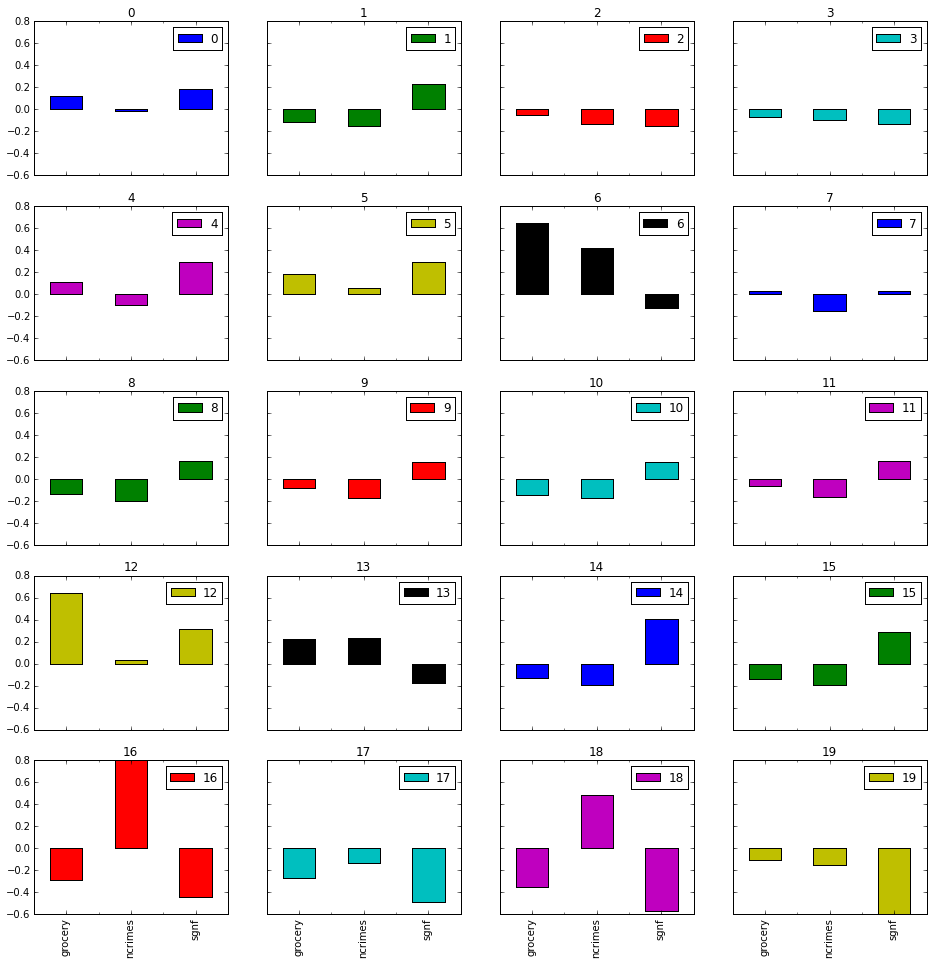

In [18]:
feature_bars(fdf, cnum, figsize=(16, 16), layout=(5,4))

In [19]:
%matplotlib notebook

In [20]:
%matplotlib inline

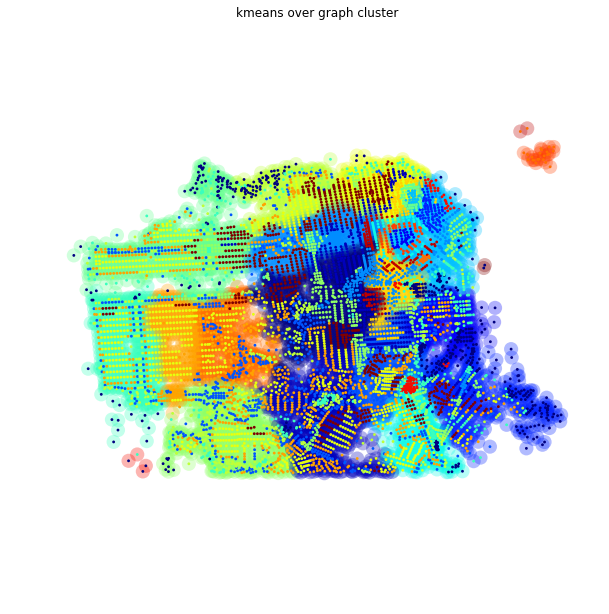

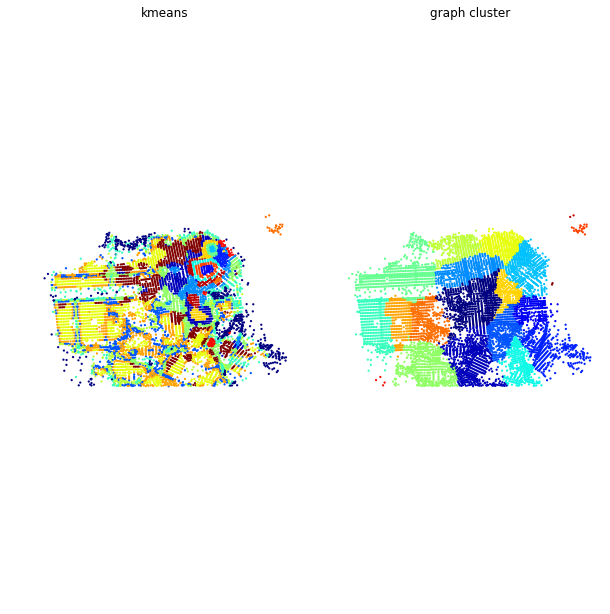

In [21]:
plt.figure(figsize = (10, 10))
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0, s=200, alpha=0.3)
plt.scatter(df.lon, df.lat, c=yhat, linewidths = 0, s=8)
plt.axis('equal')
plt.axis('off')
plt.margins(0)
plt.title('kmeans over graph cluster')

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.scatter(df.lon, df.lat, c=yhat, linewidths = 0, s=5)
plt.axis('equal')
plt.axis('off')
plt.margins(0)
plt.title('kmeans')

plt.subplot(122)
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0, s=5)
plt.axis('equal')
plt.axis('off')
plt.margins(0)
plt.title('graph cluster');

# cluster similarity

In [25]:
from sklearn.metrics.pairwise import pairwise_distances

In [27]:
# kmeans
dist = pairwise_distances(fdf.groupby(yhat).mean(), metric='l2', n_jobs=-1)
dist.shape

(20, 20)

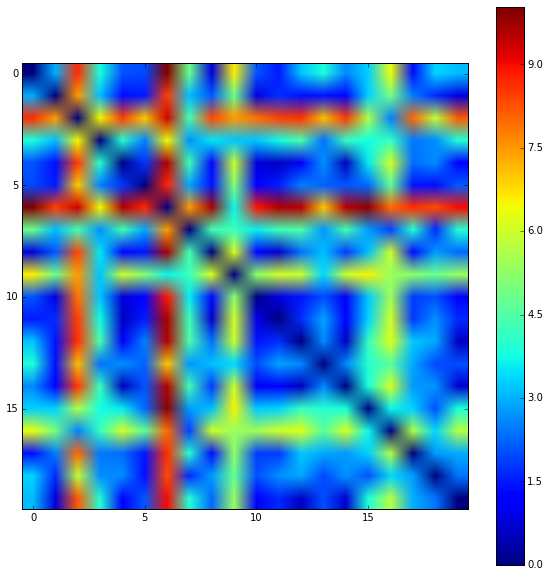

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(dist)
plt.colorbar();

In [33]:
pd.DataFrame(dist).sort_values(0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,2.950807,8.638808,3.801505,2.111699,1.985814,10.032218,4.784055,0.831658,6.570123,2.113143,1.493140,3.178405,3.858119,2.623547,3.314468,6.379003,1.408579,3.355941,3.122322
8,0.831658,2.153460,8.366059,3.557779,1.309650,1.453891,9.665234,4.324094,0.000000,6.114149,1.302959,0.689712,2.373101,3.172927,1.820045,3.148840,6.016796,1.364029,2.788222,2.291802
17,1.408579,2.499665,8.006731,2.462967,2.323029,1.473820,8.640702,3.966340,1.364029,5.230339,1.854995,1.828432,3.249700,2.907009,2.758574,3.330323,5.645041,0.000000,2.787156,2.950421
11,1.493140,1.700461,8.430180,3.743463,0.621539,1.537831,9.621634,4.286101,0.689712,6.019394,0.871113,0.000000,1.687744,2.881630,1.133336,3.338991,6.034042,1.828432,2.674484,1.661682
5,1.985814,1.491563,7.003929,2.512494,1.796008,0.000000,8.701041,2.873156,1.453891,5.121543,1.156387,1.537831,2.517246,2.209919,2.109664,2.284398,4.597301,1.473820,1.410239,2.126197
4,2.111699,1.402823,8.477468,3.958421,0.000000,1.796008,9.580569,4.285476,1.309650,5.954567,0.798769,0.621539,1.066925,2.691428,0.512111,3.574392,6.056768,2.323029,2.661770,1.117250
10,2.113143,0.871266,7.882888,3.177161,0.798769,1.156387,8.881328,3.603727,1.302959,5.249081,0.000000,0.871113,1.460403,2.023553,1.040030,3.219777,5.419501,1.854995,2.040947,1.125966
14,2.623547,1.313382,8.533074,4.175844,0.512111,2.109664,9.553871,4.331699,1.820045,5.926152,1.040030,1.133336,0.554905,2.612327,0.000000,3.825219,6.104175,2.758574,2.739797,0.742776
1,2.950807,0.000000,7.445972,3.124677,1.402823,1.491563,8.451212,3.122086,2.153460,4.799037,0.871266,1.700461,1.421272,1.413874,1.313382,3.316004,4.953496,2.499665,1.673355,0.843408
19,3.122322,0.843408,8.153156,3.900167,1.117250,2.126197,8.987757,3.899015,2.291802,5.361356,1.125966,1.661682,0.610268,2.023196,0.742776,3.873473,5.691302,2.950421,2.427396,0.000000


In [76]:
# graph cluster
dist = pairwise_distances(fdf.groupby(cnum).mean(), metric='l2', n_jobs=-1)
dist.shape

(20, 20)

numpy.ndarray

In [80]:
distdf = pd.DataFrame(dist)

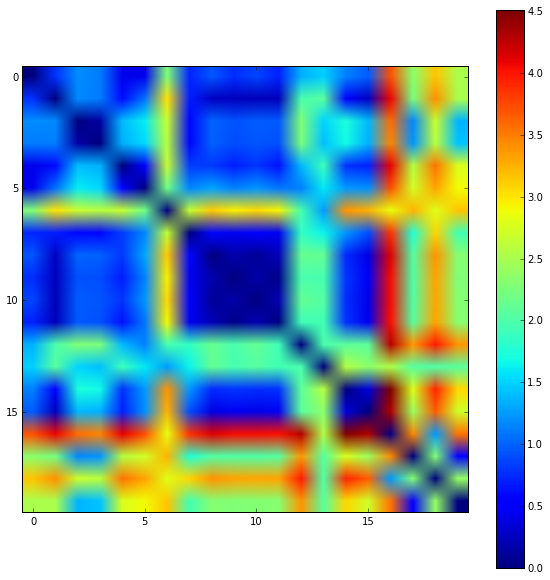

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(dist)
plt.colorbar();

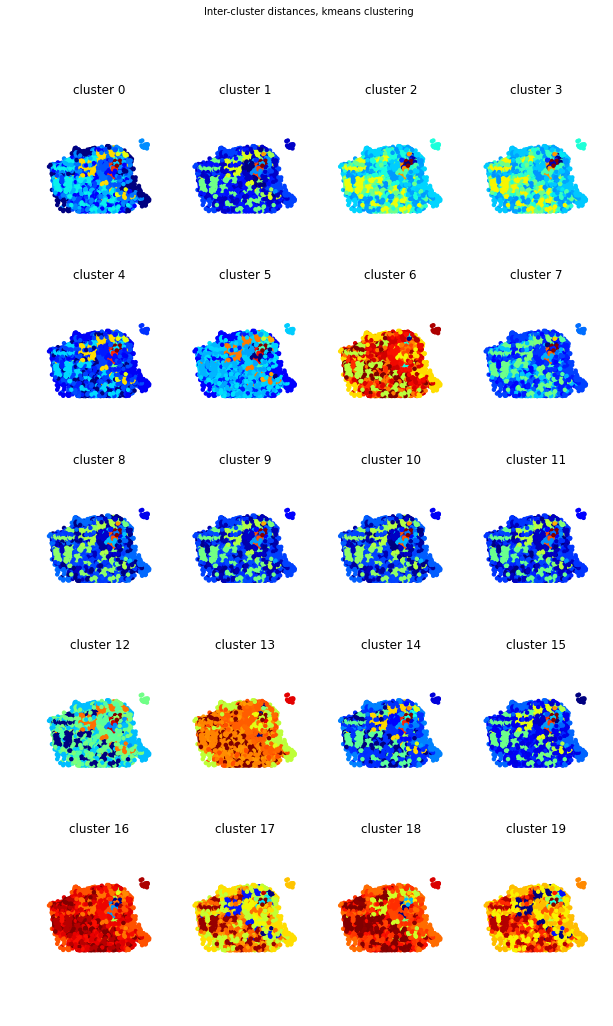

In [84]:
plt.figure(figsize=(10, 16))
plt.suptitle('Inter-cluster distances, kmeans clustering')
for i in distdf.index:
    plt.subplot(5,4,i+1)
    plt.scatter(df.lon, df.lat, c=pd.Series(yhat).replace(distdf[i]), linewidths = 0)
    plt.axis('equal')
    plt.margins(0)
    plt.axis('off')
    plt.title('cluster ' + str(i))
plt.show();

In [49]:
pd.DataFrame(dist).sort_values(0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.778692,1.197527,1.116916,0.428907,0.427636,2.282369,7.331392e-01,0.941857,0.767557,0.879964,0.721359,1.340004,1.485537,1.128072,0.975687,3.702692,2.331901,3.160196,2.512584
5,0.427636,1.070896,1.613684,1.523866,0.575070,0.000000,2.190346,1.158717e+00,1.288730,1.133114,1.227323,1.082965,1.129402,1.599540,1.250259,1.213876,3.726686,2.725735,3.322066,2.899989
4,0.428907,0.615907,1.408779,1.355474,0.000000,0.575070,2.649961,8.437501e-01,0.825097,0.689366,0.796364,0.637649,1.390122,1.912111,0.780850,0.711202,4.098273,2.566527,3.550511,2.767226
11,0.721359,0.239075,0.957126,0.923573,0.637649,1.082965,2.918247,4.566933e-01,0.226917,0.052273,0.197479,0.000000,1.934462,1.941478,0.779955,0.450835,4.034952,2.053647,3.324934,2.311064
7,0.733139,0.690264,0.590312,0.583121,0.843750,1.158717,2.650189,7.450581e-09,0.597997,0.453403,0.576611,0.456693,1.859841,1.639708,1.222558,0.902597,3.863154,1.753473,3.096916,1.943323
9,0.767557,0.257929,0.933857,0.904205,0.689366,1.133114,2.950037,4.534034e-01,0.186683,0.000000,0.163412,0.052273,1.981502,1.959282,0.799090,0.459322,4.042020,2.018745,3.318747,2.280993
1,0.778692,0.000000,1.167380,1.119806,0.615907,1.070896,3.030373,6.902637e-01,0.274657,0.257929,0.237850,0.239075,1.989532,2.076288,0.572095,0.258465,4.087737,2.229218,3.418850,2.513487
10,0.879964,0.237850,0.981167,0.944950,0.796364,1.227323,3.060133,5.766114e-01,0.104336,0.163412,0.000000,0.197479,2.123633,2.039788,0.767808,0.416035,4.038733,2.009242,3.307970,2.303034
8,0.941857,0.274657,1.009519,0.988656,0.825097,1.288730,3.129797,5.979971e-01,0.000000,0.186683,0.104336,0.226917,2.149250,2.116890,0.752263,0.394265,4.135978,2.030577,3.392273,2.318919
15,0.975687,0.258465,1.384115,1.350427,0.711202,1.213876,3.251968,9.025967e-01,0.394265,0.459322,0.416035,0.450835,2.088941,2.328746,0.358015,0.000000,4.320971,2.418914,3.658957,2.710973


In [53]:
distdf = pd.DataFrame(dist)

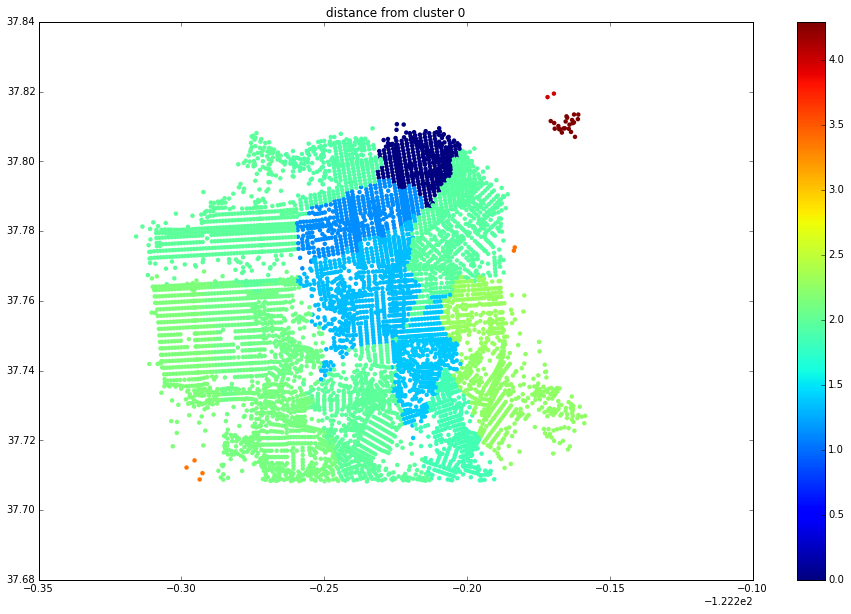

In [67]:
plt.figure(figsize = (16, 10))
plt.scatter(df.lon, df.lat, c=cnum.replace(distdf[12]), linewidths = 0)
plt.colorbar()
plt.title('distance from cluster 0');

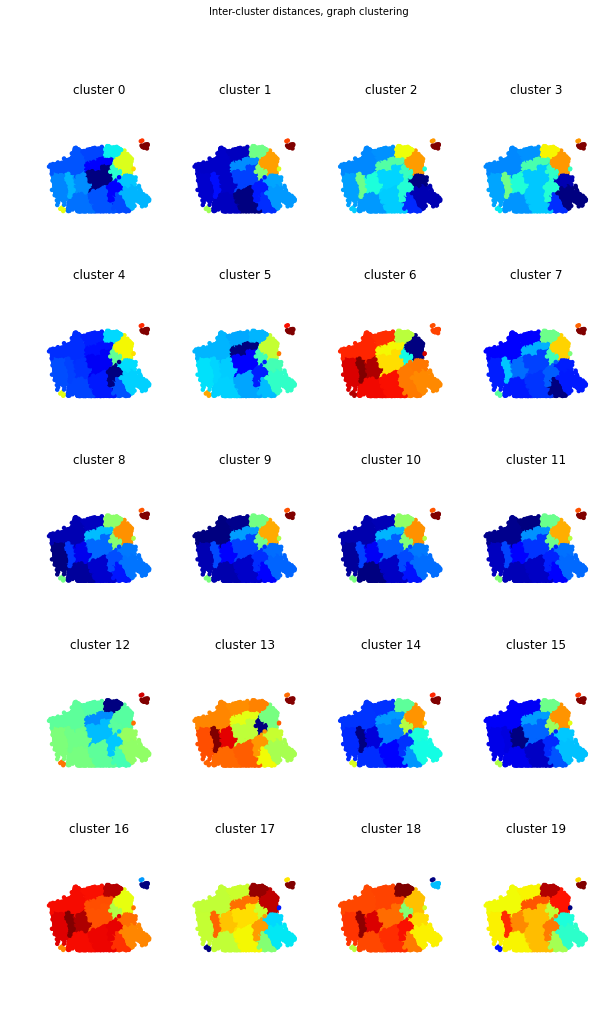

In [75]:
plt.figure(figsize=(10, 16))
plt.suptitle('Inter-cluster distances, graph clustering')
for i in distdf.index:
    plt.subplot(5,4,i+1)
    plt.scatter(df.lon, df.lat, c=cnum.replace(distdf[i]), linewidths = 0)
    plt.axis('equal')
    plt.margins(0)
    plt.axis('off')
    plt.title('cluster ' + str(i))
plt.show();